In [432]:
#Importing and adding the libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE    
from sklearn.linear_model import LinearRegression 

#### *1. Performing Data Reaading, Understanding and Preprocessing*

In [433]:
#Reading te data

df_day=pd.read_csv("day.csv")

In [434]:
df_day.shape

(730, 16)

In [435]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [436]:
df_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [437]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Note: There is no null values in this data

In [438]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### *2. Removing unwanted colunms*

In [439]:
df_day.drop(columns=['casual','registered'],inplace=True)
df_day.drop(columns=["instant","dteday"],inplace=True)


In [440]:
df_day.shape

(730, 12)

In [441]:
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

##### *Columns removed successfully now will map season colunms with correct values* 

In [442]:
df_day['season'].head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [443]:
# Changing datatype for season
df_day['season']=df_day['season'].astype(str)

In [444]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


In [445]:
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [446]:
#We will use this np.where() for mapping coulnms as colunms is having only 4 values

df_day['season']=np.where(df_day['season']=='1','Spring',np.where(df_day['season']=='2','Summer',np.where(df_day['season']=='3','Fall','Winter')))

In [447]:
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [448]:
df_day['season'].head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: object

##### *Now values are correctly mapped for season colunms same we have to do for weekkdays and whetherist colunm as well*

In [449]:
df_day['weekday'] = df_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_day['weathersit'] = df_day['weathersit'].map({1: 'Clear',2: 'Cloudy',3: 'Light_Snow_Rain_Thunder',4: 'Heavy_Rain_Thunder_Snow'})
df_day['mnth'] = df_day['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})


In [450]:
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### *3. Performing EDA for the given dataset*

In [451]:
# Univariate analysis
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [452]:
df_day['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

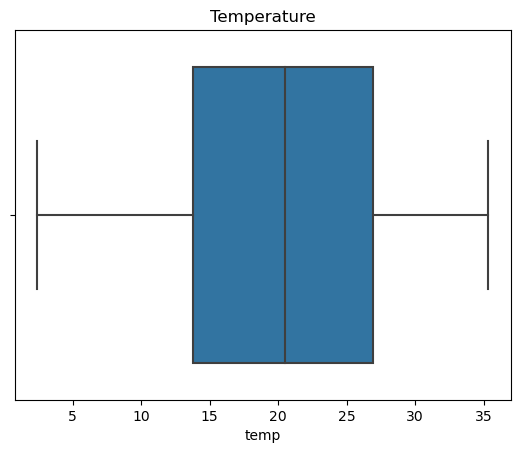

In [453]:
#1. Will plot the boxplot for temp colunm for checking outlier 
sns.boxplot(data=df_day,x='temp')
plt.title("Temperature")
plt.show()

##### *Note: There is no such outlier*

In [454]:
df_day['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

In [455]:
# Will not able to find that much of data from univariate analysis so will do bivariate analysis
# Our target variable is cnt so we need to  compare other variable with this cnt var

##### *Bivariate Analysis*

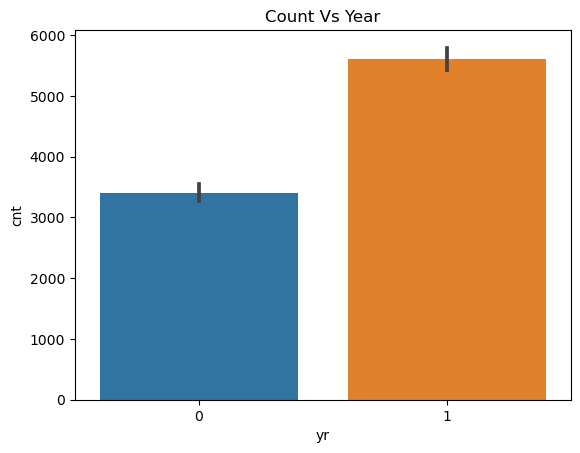

In [456]:
sns.barplot(data=df_day,x='yr',y='cnt')
plt.title("Count Vs Year")
plt.show()

##### *Will able to see clearly in graph that in year 2019 count of total rental bikes increased a lot* 

In [457]:
# Will do bivariate analysis for count with categorical variable using subplot

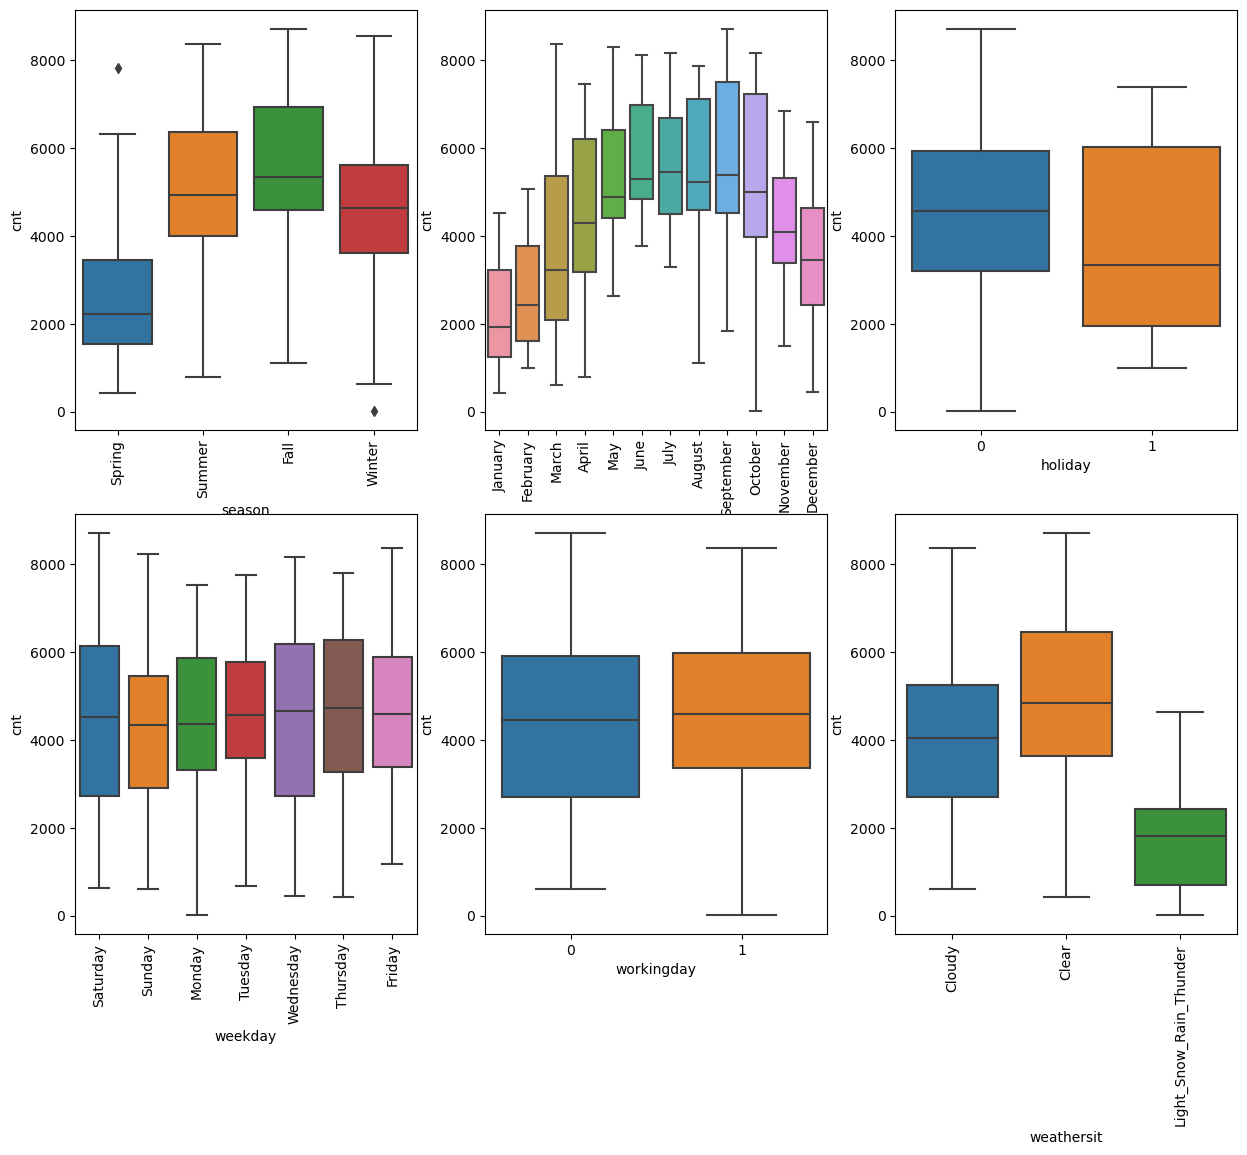

In [458]:
plt.figure(figsize=(15, 12))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df_day)
plt.xticks(rotation=90)

plt.subplot(2, 3, 2)  
sns.boxplot(x='mnth',y='cnt',data=df_day)
plt.xticks(rotation=90)

plt.subplot(2, 3, 3)  
sns.boxplot(x='holiday',y='cnt',data=df_day)

plt.subplot(2, 3, 4)  
sns.boxplot(x='weekday',y='cnt',data=df_day)
plt.xticks(rotation=90)

plt.subplot(2, 3, 5)  # Second subplot
sns.boxplot(x='workingday',y='cnt',data=df_day)


plt.subplot(2, 3, 6)  # Second subplot
sns.boxplot(x='weathersit',y='cnt',data=df_day)
plt.xticks(rotation=90)

plt.show()

##### *September tops the monthly rental count also on clear days most of the rental tooks place*

##### *Now will see the correlation amongst the variable using heatmap*

C:\Users\jayan\AppData\Local\Temp\ipykernel_10236\1321239621.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_day.corr(),cmap="YlGnBu",annot=True)


<Axes: >

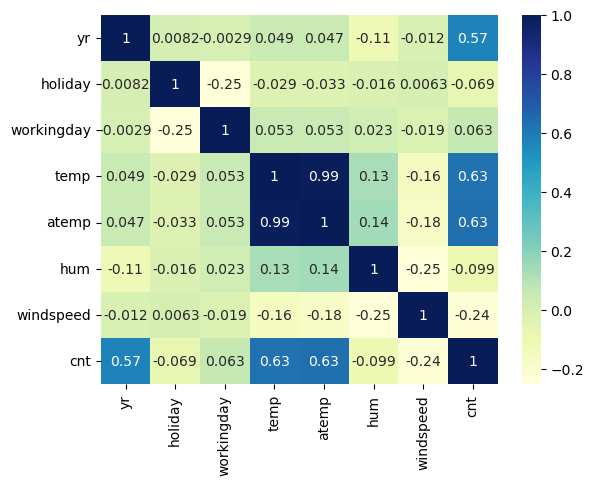

In [459]:
sns.heatmap(df_day.corr(),cmap="YlGnBu",annot=True)

##### *Year,temp is having the highest correlation values as we see it from heatmap* 

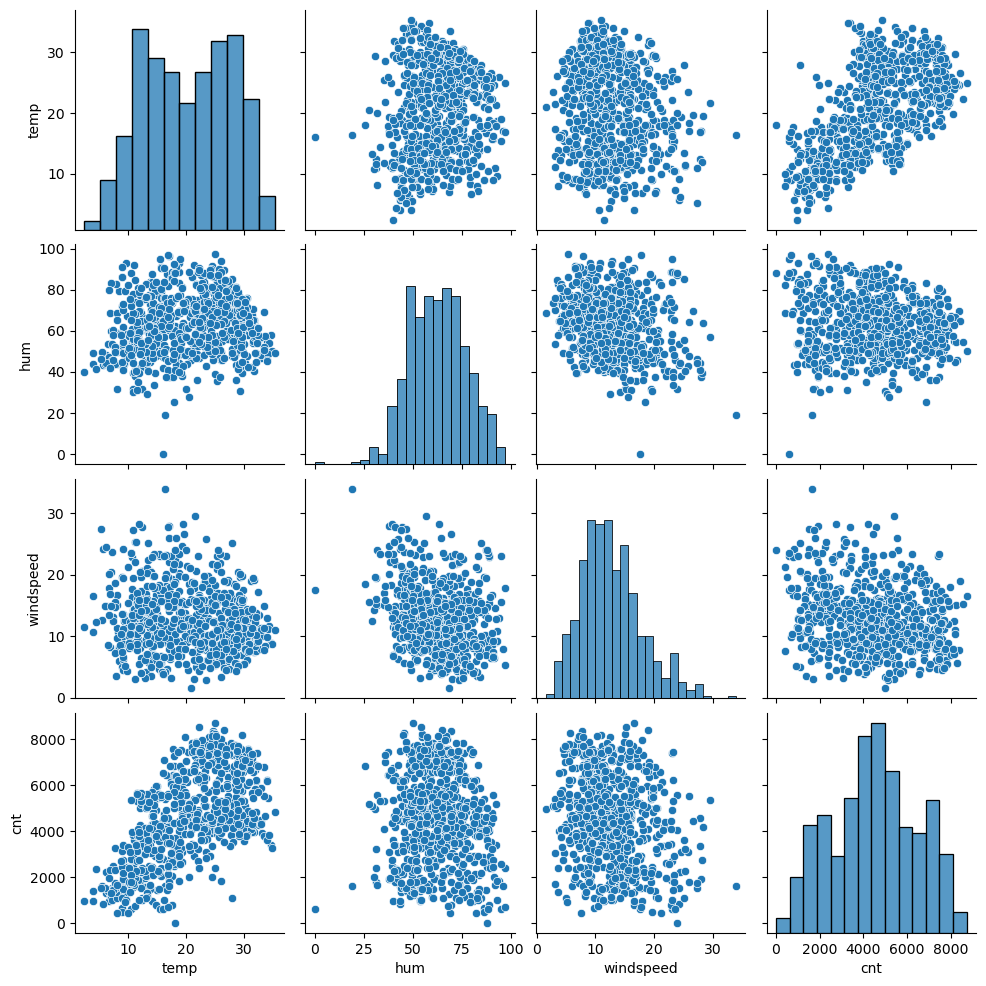

In [460]:
# Now after performing every step will start building the model
sns.pairplot(df_day,vars=["temp","hum","windspeed","cnt"])

#### *Building Model*

In [461]:
# will prepare the data first before test train split like dummy variables
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [462]:
seasond=pd.get_dummies(df_day['season'],drop_first=True)

In [463]:
seasond

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


##### *As you can see we drop the first colunm using drop first as we required n-1 vars*

In [464]:
# Similarly will create for other var as well

In [465]:
mnthd = pd.get_dummies(df_day['mnth'],drop_first=True)
weekdayd = pd.get_dummies(df_day['weekday'],drop_first=True)
weathersitd = pd.get_dummies(df_day['weathersit'],drop_first=True)

In [466]:
df_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [467]:
df_day['mnth']

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

In [468]:
# we need to merge those colunmse as well

df_day = pd.concat([df_day,seasond,mnthd,weekdayd,weathersitd],axis=1)

In [469]:
df_day.shape

(730, 34)

In [470]:
# will remove redundant columns
df_day.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [471]:
df_day.shape

(730, 30)

In [472]:
# Will do Test train split

In [473]:
df_train, df_test = train_test_split(df_day, train_size = 0.7, test_size = 0.3, random_state = 100)  #will follow 70-30 split

In [474]:
print("Train:",df_train.shape," ","Test:",df_test.shape)

Train: (510, 30)   Test: (219, 30)


In [475]:
#Rescaling using minmax scaling tecnique except for dummy varaible
scaler = MinMaxScaler()
num_vars = num_vars = ['temp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [476]:
# Separating the target variable from the features in the training data
y_train = df_train.pop("cnt")
x_train = df_train

##### *Model-1: Building model using one variable from seeing heatmap* 

In [477]:
x_train_lm = sm.add_constant(x_train["temp"])

# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

const    1497.882426
temp     5562.458744
dtype: float64

In [478]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.80e-61
Time:                        21:06:56   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.000    1161.819    1833.946
temp        5562.4587    293.549     18.949      0.000    4985.738    6139.179
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [479]:
print(y_train.isnull().sum())
print(x_train.isnull().sum())
x_train.columns

0
yr                         0
holiday                    0
workingday                 0
temp                       0
atemp                      0
hum                        0
windspeed                  0
Spring                     0
Summer                     0
Winter                     0
August                     0
December                   0
February                   0
January                    0
July                       0
June                       0
March                      0
May                        0
November                   0
October                    0
September                  0
Monday                     0
Saturday                   0
Sunday                     0
Thursday                   0
Tuesday                    0
Wednesday                  0
Cloudy                     0
Light_Snow_Rain_Thunder    0
dtype: int64


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'Light_Snow_Rain_Thunder'],
      dtype='object')

##### *As we can see after taking temp as independent variable will get R squared value 0.414 which is not good* 

##### *Model 2- Taking all the variables*

In [480]:
# Now will use multiple or all the varables
if y_train.isnull().any() or x_train.isnull().any().any():
    print("Data contains NaN values!")

# Add constant
x_train_lm = sm.add_constant(x_train)

lr_2 = sm.OLS(y_train, x_train_lm).fit()

print(lr_2.params)

const                      2112.657652
yr                         2018.348421
holiday                      88.172741
workingday                  838.055911
temp                       3488.288457
atemp                        11.552614
hum                       -1319.550957
windspeed                 -1602.699325
Spring                     -422.258575
Summer                      332.170734
Winter                      916.027215
August                      139.732668
December                   -396.109960
February                   -279.674040
January                    -543.819235
July                       -341.392838
June                        -14.807162
March                        11.194999
May                         214.614815
November                   -363.175189
October                      66.884232
September                   711.055505
Monday                     -186.894940
Saturday                    830.213253
Sunday                      356.215747
Thursday                 

In [481]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.42e-181
Time:                        21:06:57   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2112.6577    321.288      6.576      0.000    1481.356    2743.959
yr                       2018.3484     70.102     28.792      0.000    1880.604    2156.092
holiday                    88.1727    208.948      0.422      0.673    -322.392     498.737
workingday                838.0559    109.098      7.682      0.000     623.687    1052.424
temp                     3488.2885   1236.530      2.821      0.005    1058.620    5917.957
atemp                      11.5526     31.558      0.366      0.714     -50.455      73.560
hum                     -1319.5510    334.932     -3.940      0.000   -1977.661    -661.441
windspeed               -1602.6993    228.847     -7.003      0.000   -2052.362   -1153.037
Spring                   -422.2586    260.904     -1.618      0.106    -934.911      90.394
Summer                    332.1707    228.255      1.455      0.146    -116.329     780.671
Winter                    916.0272    242.975      3.770      0.000     438.603    1393.451
August                    139.7327    295.612      0.473      0.637    -441.119     720.584
December                 -396.1100    292.099     -1.356      0.176    -970.057     177.837
February                 -279.6740    286.066     -0.978      0.329    -841.768     282.419
January                  -543.8192    291.695     -1.864      0.063   -1116.974      29.335
July                     -341.3928    306.035     -1.116      0.265    -942.724     259.939
June                      -14.8072    220.224     -0.067      0.946    -447.527     417.912
March                      11.1950    213.444      0.052      0.958    -408.202     430.592
May                       214.6148    183.563      1.169      0.243    -146.069     575.299
November                 -363.1752    316.181     -1.149      0.251    -984.442     258.092
October                    66.8842    311.297      0.215      0.830    -544.786     678.555
September                 711.0555    278.938      2.549      0.011     162.969    1259.142
Monday                   -186.8949    133.933     -1.395      0.164    -450.061      76.271
Saturday                  830.2133    123.722      6.710      0.000     587.110    1073.317
Sunday                    356.2157    125.456      2.839      0.005     109.706     602.725
Thursday                  -84.7453    135.502     -0.625      0.532    -350.994     181.503
Tuesday                  -167.8272    135.152     -1.242      0.215    -433.388      97.734
Wednesday                 -49.8292    129.803     -0.384      0.701    -304.881     205.222
Cloudy                   -530.4746     90.763     -5.845      0.000    -708.815    -352.134
Light_Snow_Rain_Thunder -2231.2111    229.741     -9.712      0.000   -2682.632   -1779.791
===============================================

In [482]:
# Now we will check the vif which tells how the features are correlated

vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,93.88
3,temp,67.12
4,atemp,56.09
22,Saturday,21.94
23,Sunday,20.40
7,Spring,10.80
9,Winter,9.52
8,Summer,8.31
18,November,6.80
19,October,6.59


##### *Will drop the columns from the train dataset that are having VIF<5 and also P value < 0.05 because that wont create that much impact* 

##### *Model-3 Eliminating High VIF and High Pvalue colunms*

In [483]:

# Add constant
x_train_lm = sm.add_constant(x_train[["yr","windspeed","Light_Snow_Rain_Thunder",'holiday',"Cloudy","hum","temp"]]) #these are the selected colunms

lr_3 = sm.OLS(y_train, x_train_lm).fit()

print(lr_3.params)

const                      2084.423601
yr                         2014.273002
windspeed                 -1720.108757
Light_Snow_Rain_Thunder   -1971.445284
holiday                    -746.838857
Cloudy                     -525.783353
hum                        -523.128229
temp                       4706.159917
dtype: float64


In [484]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     231.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.67e-152
Time:                        21:06:57   Log-Likelihood:                -4220.1
No. Observations:                 510   AIC:                             8456.
Df Residuals:                     502   BIC:                             8490.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2084.4236    282.892      7.368      0.000    1528.625    2640.222
yr                       2014.2730     85.840     23.465      0.000    1845.622    2182.924
windspeed               -1720.1088    268.296     -6.411      0.000   -2247.230   -1192.988
Light_Snow_Rain_Thunder -1971.4453    278.087     -7.089      0.000   -2517.803   -1425.087
holiday                  -746.8389    269.946     -2.767      0.006   -1277.202    -216.476
Cloudy                   -525.7834    110.432     -4.761      0.000    -742.749    -308.818
hum                      -523.1282    387.571     -1.350      0.178   -1284.589     238.332
temp                     4706.1599    198.811     23.671      0.000    4315.555    5096.765
==============================================================================
Omnibus:                       10.397   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.298
Skew:                          -0.276   Prob(JB):                      0.00352
Kurtosis:                       3.477   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  *Now as we see the R sqaure and adj R sqaure decreased will use RFE automated approach for feature selection and will build the final model Model 4* 

In [485]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(x_train, y_train)
rfe_table=pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=["feature","support","rank"])
rfe_table.sort_values(by="rank",ascending=True)

,feature,support,rank
0,yr,True,1
23,Sunday,True,1
22,Saturday,True,1
20,September,True,1
18,November,True,1
17,May,True,1
27,Cloudy,True,1
13,January,True,1
12,February,True,1
11,December,True,1


In [486]:
## Will select only column having support true
feature_selected=x_train.columns[rfe_table['support']==True]

In [487]:
x_train_rfe=x_train[feature_selected]
x_train_rfe.shape

(510, 20)

In [488]:
x_train_lm=sm.add_constant(x_train_rfe)

lr_4=LinearRegression()
lr_4=sm.OLS(y_train,x_train_lm).fit()

lr_4.params

const                      2179.623358
yr                         2014.092021
holiday                       9.991566
workingday                  820.858079
temp                       3911.776668
hum                       -1322.402098
windspeed                 -1623.898099
Spring                     -486.624148
Summer                      234.187188
Winter                      879.429713
December                   -440.071950
February                   -308.158146
January                    -572.121937
July                       -445.030081
May                         217.459814
November                   -420.159268
September                   623.654958
Saturday                    912.000554
Sunday                      436.773159
Cloudy                     -520.820273
Light_Snow_Rain_Thunder   -2228.603866
dtype: float64

In [489]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.59e-189
Time:                        21:06:57   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2179.6234    262.010      8.319      0.000    1664.821    2694.426
yr                       2014.0920     69.093     29.150      0.000    1878.337    2149.847
holiday                     9.9916    188.556      0.053      0.958    -360.486     380.469
workingday                820.8581     85.973      9.548      0.000     651.937     989.780
temp                     3911.7767    331.625     11.796      0.000    3260.193    4563.360
hum                     -1322.4021    326.148     -4.055      0.000   -1963.223    -681.581
windspeed               -1623.8981    220.474     -7.365      0.000   -2057.089   -1190.708
Spring                   -486.6241    189.893     -2.563      0.011    -859.729    -113.519
Summer                    234.1872    146.977      1.593      0.112     -54.596     522.970
Winter                    879.4297    154.140      5.705      0.000     576.574    1182.286
December                 -440.0719    156.750     -2.807      0.005    -748.057    -132.087
February                 -308.1581    185.476     -1.661      0.097    -672.584      56.268
January                  -572.1219    183.990     -3.110      0.002    -933.628    -210.616
July                     -445.0301    155.709     -2.858      0.004    -750.970    -139.091
May                       217.4598    150.109      1.449      0.148     -77.476     512.396
November                 -420.1593    162.090     -2.592      0.010    -738.636    -101.682
September                 623.6550    144.239      4.324      0.000     340.252     907.057
Saturday                  912.0006    103.199      8.837      0.000     709.233    1114.768
Sunday                    436.7732    107.417      4.066      0.000     225.719     647.827
Cloudy                   -520.8203     89.687     -5.807      0.000    -697.039    -344.602
Light_Snow_Rain_Thunder -2228.6039    226.329     -9.847      0.000   -2673.299   -1783.909
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                     1.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [490]:
# again checking VIF will drop the colunms having High Pvalue and VIF value

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,60.93
16,Saturday,14.59
17,Sunday,13.91
6,Spring,5.79
3,temp,4.88
8,Winter,3.88
7,Summer,3.49
1,holiday,3.43
11,January,2.38
4,hum,1.97


##### *Again if we want we can drop the colunms having high P value and High VIF value and the again we will build the model but I am using Lr_4 because it is having good R and adj R square value*

##### Residual Analysis

In [491]:
x_train_sm = sm.add_constant(x_train_rfe)
y_train_pred = lr_4.predict(x_train_sm)

C:\Users\jayan\AppData\Local\Temp\ipykernel_10236\1479800535.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

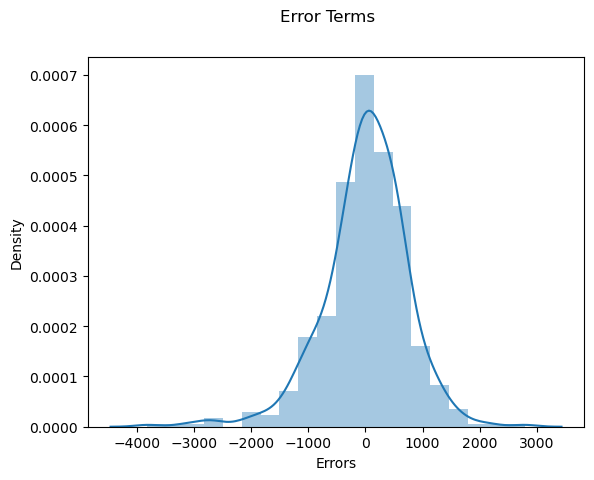

In [492]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms')                  # Plot heading 
plt.xlabel('Errors')

#### *Model Evaluation*

In [493]:
num_vars = num_vars = ['temp','hum','windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [494]:
y_test = df_test.pop('cnt')  # taking x-test and y_test
x_test = df_test

Text(0, 0.5, 'y_pred_mlr_11')

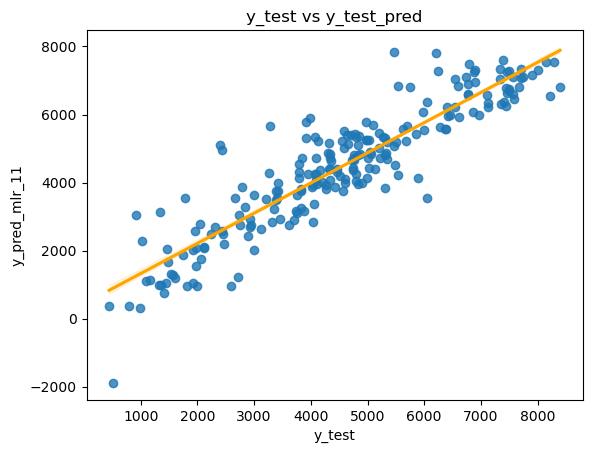

In [495]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred,ci=68,fit_reg=True,line_kws={"color": "orange"})
plt.title('y_test vs y_test_pred')         
plt.xlabel('y_test')                         
plt.ylabel('y_pred_mlr_11')

In [496]:

x_test_lm = sm.add_constant(x_test[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'December', 'February', 'January', 'July', 'May',
       'November', 'September', 'Saturday', 'Sunday', 'Cloudy',
       'Light_Snow_Rain_Thunder']])
y_test_pred=lr_4.predict(x_test_lm)

In [497]:
# CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA 
from sklearn.metrics import mean_squared_error,r2_score

mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8523147121225637
R-squared for test data: 0.8206945773767195
Mean Squared Error 802.129
